In [1]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

%matplotlib inline
rnd = np.random.RandomState(seed=42)

In [2]:
n_data = 9 # number of data points
a_true = 1.255 # randomly chosen truth
b_true = 4.507 

In [3]:
# randomly generate some x values over some domain by sampling from a uniform distribution
x = rnd.uniform(0, 2., n_data)
#x = log10_lg
x.sort() # sort the values in place

# evaluate the true model at the given x values
y = a_true*x + b_true

# Heteroscedastic Gaussian uncertainties only in y direction
y_err = rnd.uniform(0.1, 0.2, size=n_data) # randomly generate uncertainty for each datum
#y_err = np.mean(yerror)
y = rnd.normal(y, y_err) # re-sample y data with noise
#y = Ko_ndens

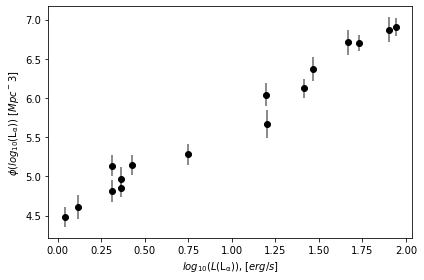

In [5]:
datastyle = dict(linestyle='none', marker='o', color='k', ecolor='#666666')
plt.errorbar(x, y, y_err, **datastyle)
plt.xlabel(r'$log_{10}({L(\mathrm{L_\alpha})})$, [$erg/s$]')
plt.ylabel(r'$\phi(log_{10}(\mathrm{L_\alpha}))\ [Mpc^-3]$')
plt.tight_layout()

In [18]:
def line_model(pars, x):
    """
    Evaluate a straight line model at the input x values.
    
    Parameters
    ----------
    pars : list, array
        This should be a length-2 array or list containing the 
        parameter values (a, b) for the (slope, intercept).
    x : numeric, list, array
        The coordinate values.
        
    Returns
    -------
    y : array
        The computed y values at each input x.
    """
    return pars[0]*np.array(x) + pars[1]

def weighted_squared_deviation(pars, x, y, y_err):
    """
    Compute the weighted squared deviation between the data 
    (x, y, y_err) and the model points computed with the input 
    parameters (pars).
    """
    chi = (y - line_model(pars, x)) / y_err
    return np.sum(chi**2)

In [19]:
# make a 256x256 grid of parameter values centered on the true values
a_grid = np.linspace(a_true-2., a_true+2, 256)
b_grid = np.linspace(b_true-2., b_true+2, 256)
a_grid,b_grid = np.meshgrid(a_grid, b_grid)
ab_grid = np.vstack((a_grid.ravel(), b_grid.ravel())).T

In [20]:
x0 = [1., 1.] # starting guess for the optimizer 

result_sq = minimize(weighted_squared_deviation, x0=x0, 
                     args=(x, y, y_err), # passed to the weighted_*_deviation function after pars
                     method='BFGS')

best_pars_sq = result_sq.x

      fun: 13.186069955514327
 hess_inv: array([[ 0.00126685, -0.00122482],
       [-0.00122482,  0.00175654]])
      jac: array([-8.34465027e-06, -5.60283661e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([1.25017892, 4.48345389])
[1.25017892 4.48345389]


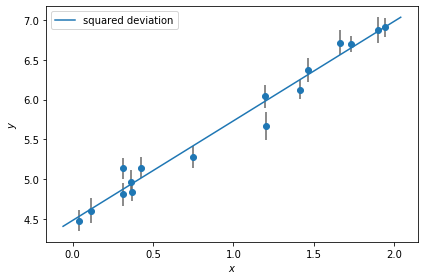

In [22]:
plt.errorbar(x, y, y_err, linestyle='none', marker='o', ecolor='#666666')

x_grid = np.linspace(x.min()-0.1, x.max()+0.1, 128)

#plot(interp. info, linemodel)?
plt.plot(x_grid, line_model(best_pars_sq, x_grid), 
         marker='', linestyle='-', label='squared deviation')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(loc='best')
plt.tight_layout()